# Merit Order Effect Quantification

[![Binder](https://notebooks.gesis.org/binder/badge_logo.svg)](https://notebooks.gesis.org/binder/v2/gh/AyrtonB/Merit-Order-Effect/main?filepath=nbs%2Fug-07-moe-quantification.ipynb)

This notebook outlines how the `moepy` library can be used to quantify the merit order effect of intermittent RES on electricity prices. Please note that the fitted model and estimated results are less accurate than those found in the set of development notebooks, as this notebook is for tutorial purposes the ones found here are using less data and smooth over larger time-periods to reduce computation time.

<br>

### Imports

In [44]:
import pandas as pd
import numpy as np

import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from moepy import moe

<br>

### Data Loading

We'll first load the data in

In [2]:
df_EI = pd.read_csv('../data/ug/electric_insights.csv')

df_EI['local_datetime'] = pd.to_datetime(df_EI['local_datetime'], utc=True)
df_EI = df_EI.set_index('local_datetime')

df_EI.head()

,day_ahead_price,SP,imbalance_price,valueSum,temperature,TCO2_per_h,gCO2_per_kWh,nuclear,biomass,coal,...,demand,pumped_storage,wind_onshore,wind_offshore,belgian,dutch,french,ireland,northern_ireland,irish
local_datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00+00:00,32.91,1.0,55.77,55.77,1.1,16268.0,429.0,7.897,0.0,9.902,...,37.948,-0.435,NaN,NaN,0.0,0.0,1.963,0.0,0.0,-0.234
2010-01-01 00:30:00+00:00,33.25,2.0,59.89,59.89,1.1,16432.0,430.0,7.897,0.0,10.074,...,38.227,-0.348,NaN,NaN,0.0,0.0,1.974,0.0,0.0,-0.236
2010-01-01 01:00:00+00:00,32.07,3.0,53.15,53.15,1.1,16318.0,431.0,7.893,0.0,10.049,...,37.898,-0.424,NaN,NaN,0.0,0.0,1.983,0.0,0.0,-0.236
2010-01-01 01:30:00+00:00,31.99,4.0,38.48,38.48,1.1,15768.0,427.0,7.896,0.0,9.673,...,36.918,-0.575,NaN,NaN,0.0,0.0,1.983,0.0,0.0,-0.236
2010-01-01 02:00:00+00:00,31.47,5.0,37.70,37.70,1.1,15250.0,424.0,7.900,0.0,9.370,...,35.961,-0.643,NaN,NaN,0.0,0.0,1.983,0.0,0.0,-0.236


<br>

### Generating Predictions

We'll use a helper function to both load in our model and make a prediction in a single step

In [38]:
model_fp = '../data/ug/GB_detailed_example_model_p50.pkl'
dt_pred = pd.date_range('2020-01-01', '2021-01-01').tz_localize('Europe/London')

df_pred = moe.construct_df_pred(model_fp, dt_pred=dt_pred)

df_pred.head()

,2020-01-01 00:00:00+00:00,2020-01-02 00:00:00+00:00,2020-01-03 00:00:00+00:00,2020-01-04 00:00:00+00:00,2020-01-05 00:00:00+00:00,2020-01-06 00:00:00+00:00,2020-01-07 00:00:00+00:00,2020-01-08 00:00:00+00:00,2020-01-09 00:00:00+00:00,2020-01-10 00:00:00+00:00,...,2020-12-23 00:00:00+00:00,2020-12-24 00:00:00+00:00,2020-12-25 00:00:00+00:00,2020-12-26 00:00:00+00:00,2020-12-27 00:00:00+00:00,2020-12-28 00:00:00+00:00,2020-12-29 00:00:00+00:00,2020-12-30 00:00:00+00:00,2020-12-31 00:00:00+00:00,2021-01-01 00:00:00+00:00
-2.0,-18.531269,-18.519243,-18.507354,-18.495604,-18.483992,-18.472518,-18.461181,-18.449978,-18.438909,-18.427972,...,-14.417429,-14.415904,-14.414630,-14.413590,-14.412764,-14.412131,-14.411668,-14.411352,-14.411156,-14.411054
-1.9,-18.276208,-18.264246,-18.252421,-18.240734,-18.229184,-18.217771,-18.206494,-18.195351,-18.184341,-18.173462,...,-14.184346,-14.182829,-14.181562,-14.180528,-14.179706,-14.179077,-14.178616,-14.178302,-14.178107,-14.178005
-1.8,-18.021824,-18.009926,-17.998164,-17.986540,-17.975052,-17.963700,-17.952483,-17.941400,-17.930449,-17.919628,...,-13.951860,-13.950351,-13.949091,-13.948062,-13.947245,-13.946619,-13.946161,-13.945848,-13.945654,-13.945553
-1.7,-17.768115,-17.756281,-17.744582,-17.733020,-17.721593,-17.710303,-17.699146,-17.688122,-17.677230,-17.666467,...,-13.719969,-13.718468,-13.717215,-13.716192,-13.715379,-13.714756,-13.714301,-13.713989,-13.713797,-13.713696
-1.6,-17.515078,-17.503306,-17.491671,-17.480171,-17.468805,-17.457575,-17.446478,-17.435514,-17.424680,-17.413975,...,-13.488669,-13.487177,-13.485930,-13.484913,-13.484104,-13.483484,-13.483032,-13.482722,-13.482530,-13.482430


<br>

We can now use `moe.construct_pred_ts` to generate a prediction time-series from our surface estimation and the observed dispatchable generation

In [50]:
s_dispatchable = (df_EI_model['demand'] - df_EI_model[['solar', 'wind']].sum(axis=1)).dropna().loc[:df_pred.columns[-2]+pd.Timedelta(hours=23, minutes=30)]

s_pred_ts = moe.construct_pred_ts(s_dispatchable['2020'], df_pred)

s_pred_ts.head()

 [████████████████████████████████████████████████████████████] 23357/23357 [01:14<00:00, 0.00s/it]

local_datetime
2020-01-01 00:00:00+00:00    32.080126
2020-01-01 00:30:00+00:00    32.627349
2020-01-01 01:00:00+00:00    32.296901
2020-01-01 01:30:00+00:00    31.561614
2020-01-01 02:00:00+00:00    31.078722
dtype: float64

<br>

We can visualise the error distribution to see how our model is performing

To reduce this error the resolution of the date-smoothing and LOWESS fit can be increased, this is what was done for the research paper and is shown in the set of development notebooks. Looking at 2020 also increases the error somewhat.

8.897118237665632


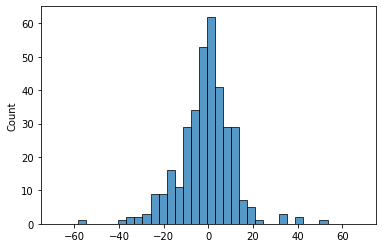

In [45]:
s_price = df_EI['day_ahead_price']

s_err = s_pred_ts - s_price.loc[s_pred_ts.index]
print(s_err.abs().mean())

sns.histplot(s_err)
_ = plt.xlim(-75, 75)

<br>

### Calculating the MOE

To calculate the MOE we have to generate a counterfactual price, in this case the estimate is of the cost of electricity if RES had not been on the system. Subtracting the simulated price from the counterfactual price results in a time-series of our simulated MOE.

In [55]:
s_demand = df_EI_model.loc[s_dispatchable.index, 'demand']
s_demand_pred_ts = moe.construct_pred_ts(s_demand['2020'], df_pred)

s_MOE = s_demand_pred_ts - s_pred_ts
s_MOE = s_MOE.dropna()

s_MOE.mean() # N.b for the reasons previously mentioned this particular value is inaccurate

 [████████████████████████████████████████████████████████████] 35105/35105 [01:39<00:00, 0.00s/it]

11.215738750384316